# Laboratory practice № 12 (tracking & compensation)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [53]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp

In [54]:
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')

## Task 1

In [55]:
A_1 = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 2, 0]
])

B_1 = np.array([
    [0],
    [1],
    [0],
    [1]
])

B_2 = np.array([
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
    [2, 0, 2, 0]
])

A_2 = np.array([
    [0, 2, 0, 0],
    [-2, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 0, -3, 0]
])

C_2 = np.array([[0, 0, 1, 0]])

D_2 = np.array([[0, 0, 0, 0]])

In [56]:
P = cp.Variable(A_1.shape)
Y = cp.Variable((B_1.shape[1],B_1.shape[0])) 
prob = cp.Problem(cp.Maximize(0),[C_2 @ P + D_2 == 0, P @ A_2 - A_1 @ P == B_1 @ Y + B_2])
prob.solve()

/home/vladislav/.pyenv/versions/3.10.11/envs/control/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


0.0

In [57]:
P.value

array([[ 2.50000000e-01,  0.00000000e+00,  1.11111111e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         3.33333333e-01],
       [-2.98938063e-14,  0.00000000e+00, -2.87075551e-14,
         0.00000000e+00],
       [ 0.00000000e+00, -9.53460721e-14,  0.00000000e+00,
        -1.41148574e-13]])

In [58]:
Y.value

array([[-2.,  0., -2.,  0.]])

In [59]:
def generate_LQR(a,b,q,r):
    k, p, _ = ctrl.lqr(a,b,q,r)
    return -k, p

In [60]:
K_1, _ = generate_LQR(A_1, B_1, np.eye(4), np.eye(1))

In [61]:
K_1

array([[ 1.        ,  3.96076458, -9.34382802, -8.28368674]])

In [62]:
np.linalg.eigvals(A_1 + B_1@K_1)

array([-2.06952682+0.j        , -1.17045465+0.j        ,
       -0.54147035+0.34589422j, -0.54147035-0.34589422j])

In [63]:
K_2 = Y.value - K_1 @ P.value
K_2

array([[-2.25      , -1.98038229, -2.11111111, -1.32025486]])

In [64]:
sys_1 = ctrl.ss(A_1 + B_1@K_1, B_2 + B_1@K_2, C_2, D_2)

In [65]:
time_1 = np.linspace(0,30,int(30/0.005))

In [66]:
w_sys_1 = ctrl.ss(A_2, np.zeros((4,1)), np.zeros((1, 4)), 0)
w_1 = ctrl.initial_response(w_sys_1, X0=[0.5, 0., 0.5, 0.], T=time_1).states

In [67]:
w_1.shape

(4, 6000)

In [68]:
w_1

array([[ 0.5       ,  0.49997499,  0.49989997, ..., -0.47915963,
        -0.47770695, -0.47620649],
       [ 0.        , -0.00500075, -0.010001  , ...,  0.14284974,
         0.14763491,  0.15240531],
       [ 0.5       ,  0.49994373,  0.49977494, ..., -0.21052579,
        -0.21730575, -0.22403681],
       [ 0.        , -0.00750097, -0.01500025, ..., -0.45351835,
        -0.45030901, -0.44699833]])

In [69]:
out_1 = ctrl.forced_response(sys_1,T=time_1,U=w_1)

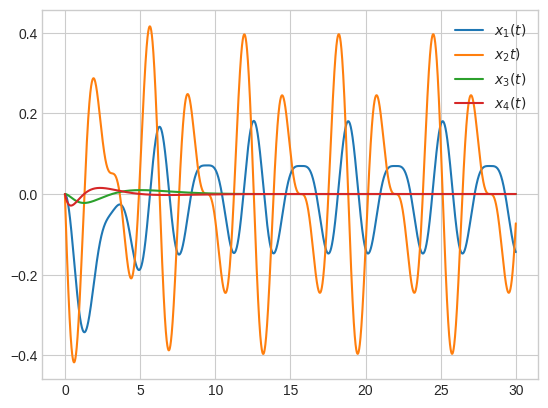

In [70]:
plt.plot(time_1, out_1.states[0], label="$x_1(t)$")
plt.plot(time_1, out_1.states[1], label="$x_2t)$")
plt.plot(time_1, out_1.states[2], label="$x_3(t)$")
plt.plot(time_1, out_1.states[3], label="$x_4(t)$")
plt.legend()

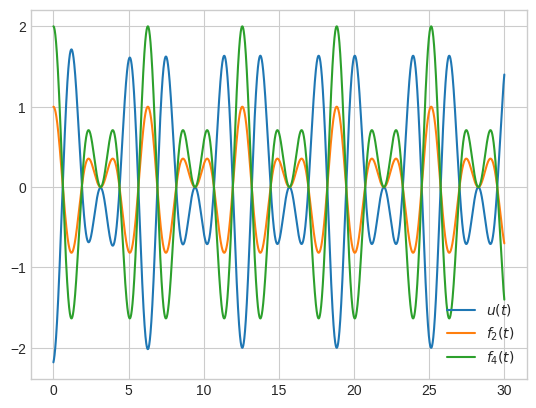

In [71]:
plt.plot(time_1, (K_1 @ out_1.states + K_2 @ w_1)[0], label="$u(t)$")
plt.plot(time_1, (B_2 @ w_1)[1], label="$f_2(t)$")
plt.plot(time_1, (B_2 @ w_1)[3], label="$f_4(t)$")
plt.legend()

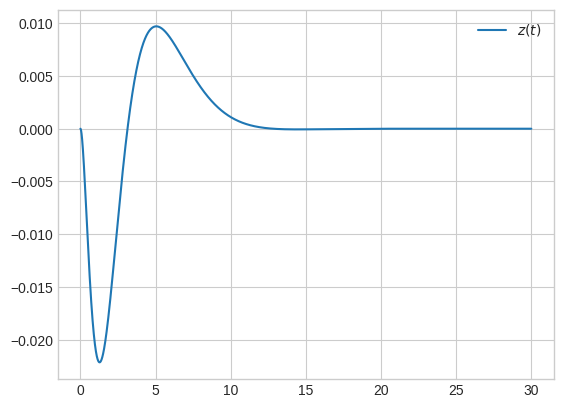

In [72]:
plt.plot(time_1, out_1.outputs[0],label="$z(t)$")
plt.legend()

## Task 2

In [73]:
B_2 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

A_2 = np.array([
    [0, 2, 0, 0],
    [-2, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0]
])

C_2 = np.array([[0, 0, 1, 0]])

D_2 = np.array([[-1, 0, -2, 0]])

In [74]:
P = cp.Variable(A_1.shape)
Y = cp.Variable((B_1.shape[1],B_1.shape[0])) 
prob = cp.Problem(cp.Maximize(0),[C_2 @ P + D_2 == 0, P @ A_2 - A_1 @ P == B_1 @ Y + B_2])
prob.solve()

0.0

In [75]:
P.value

array([[1.25, 0.  , 4.  , 0.  ],
       [0.  , 2.5 , 0.  , 4.  ],
       [1.  , 0.  , 2.  , 0.  ],
       [0.  , 2.  , 0.  , 2.  ]])

In [76]:
Y.value

array([[-6.,  0., -6.,  0.]])

In [77]:
K_1, _ = generate_LQR(A_1, B_1, np.eye(4), np.eye(1))
K_1

array([[ 1.        ,  3.96076458, -9.34382802, -8.28368674]])

In [78]:
K_2 = Y.value - K_1 @ P.value
K_2

array([[2.09382802, 6.66546204, 8.68765604, 0.72431517]])

In [79]:
sys_2 = ctrl.ss(A_1 + B_1@K_1, B_2 + B_1@K_2, C_2, D_2)

In [80]:
time_2 = np.linspace(0,30,int(30/0.005))

In [81]:
w_sys_2 = ctrl.ss(A_2, np.zeros((4,1)), np.zeros((1, 4)), 0)
w_2 = ctrl.initial_response(w_sys_2, X0=[0.5, 0.5, 0.5, 1], T=time_2).states

In [82]:
out_2 = ctrl.forced_response(sys_2,T=time_2,U=w_2)

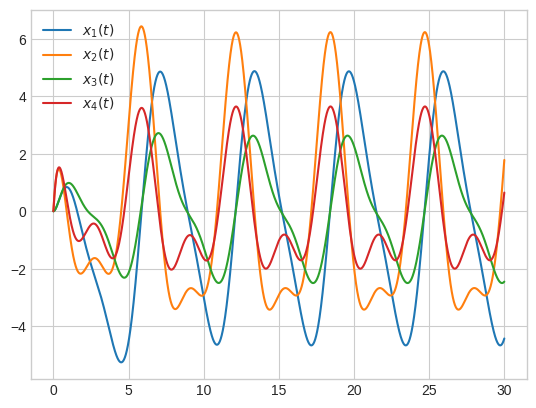

In [83]:
plt.plot(time_2, out_2.states[0], label="$x_1(t)$")
plt.plot(time_2, out_2.states[1], label="$x_2(t)$")
plt.plot(time_2, out_2.states[2], label="$x_3(t)$")
plt.plot(time_2, out_2.states[3], label="$x_4(t)$")
plt.legend()

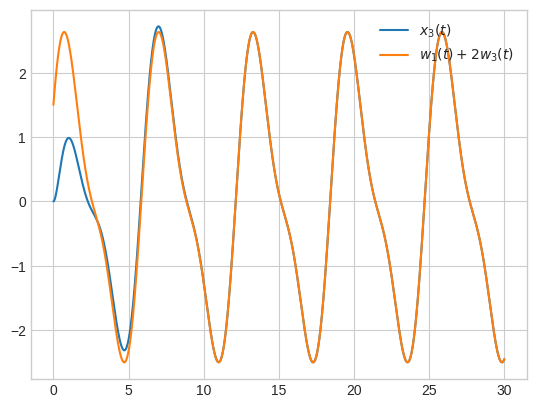

In [84]:
plt.plot(time_2, out_2.states[2], label="$x_3(t)$")
plt.plot(time_2, 2*w_2[2] + w_2[0], label="$w_1(t) + 2w_3(t)$")
plt.legend()

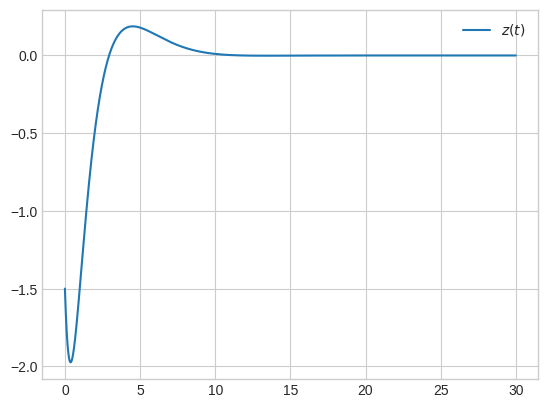

In [85]:
plt.plot(time_2, out_2.outputs[0],label="$z(t)$")
plt.legend()

## Task 3

In [86]:
A_1 = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 2, 0]
])

B_1 = np.array([
    [0],
    [1],
    [0],
    [1]
])

B_2 = np.array([
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
    [2, 0, 2, 0]
])

A_2 = np.array([
    [0, 2, 0, 0],
    [-2, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 0, -3, 0]
])

C_1 = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

D_1 = np.array([
    [0.1, 0, 0, 0],
    [0, 0.3, 0, 0]
])

C_2 = np.array([
    [0, 1, 0, 0],
])

D_2 = np.array([
    [-1, -2, 0, 0],
])

In [87]:
def generate_Kalman(a, c, q, r):
    l, p, _ = ctrl.lqe(a,np.eye(8),c,q,r)
    return l, p 

In [88]:
A_obs = np.block([
    [A_1, B_2],
    [np.zeros((4, 4)), A_2]
])
C_obs = np.block([
    [C_1, D_1]
])
L, _ = generate_Kalman(A_obs, C_obs, np.eye(8), np.eye(2))
L_1, L_2 = -L[:4], -L[4:]

In [89]:
L_1

array([[-2.00529381, -0.84354599],
       [-1.86526699, -2.56802899],
       [-0.88533984, -4.03968712],
       [-1.83457462, -6.32152756]])

In [90]:
L_2

array([[0.0540191 , 1.06468462],
       [0.49420769, 0.78694813],
       [0.25268668, 0.16353145],
       [0.55355107, 1.26609167]])

In [91]:
K_1, _ = generate_LQR(A_1, B_1, np.eye(4), np.eye(1))
K_1

array([[ 1.        ,  3.96076458, -9.34382802, -8.28368674]])

In [92]:
P = cp.Variable(A_1.shape)
Y = cp.Variable((B_1.shape[1],B_1.shape[0])) 
prob = cp.Problem(cp.Maximize(0),[C_2 @ P + D_2 == 0, P @ A_2 - A_1 @ P == B_1 @ Y + B_2])
prob.solve()

0.0

In [93]:
K_2 = Y.value - K_1 @ P.value
K_2

array([[ 1.67248163,  1.18136373, -1.8343828 , -2.48510602]])

In [94]:
np.linalg.eigvals(A_1 + B_1@K_1)

array([-2.06952682+0.j        , -1.17045465+0.j        ,
       -0.54147035+0.34589422j, -0.54147035-0.34589422j])

In [95]:
A_new = np.block([
    [A_1 + B_1@K_1, np.zeros((4,4)), np.zeros((4,4))],
    [np.zeros((4,4)), A_1 + L_1@C_1, B_2 + L_1@D_1],
    [np.zeros((4,4)), L_2@C_1, A_2 + L_2@D_1]
])

B_new = np.block([
    [B_2 + B_1@K_2],
    [np.zeros((4,4))],
    [np.zeros((4,4))]
])

C_new = np.block([
    [C_1, np.zeros((2, 4)), np.zeros((2, 4))],
    [C_1, -C_1, -D_1],
    [C_2, np.zeros((1, 4)), np.zeros((1, 4))]
])
D_new = np.block([
    [D_1],
    [D_1],
    [D_2]
])

In [96]:
sys_3 = ctrl.ss(A_new, B_new, C_new, D_new)
time_3 = np.linspace(0,40,int(40/0.005))
w_sys_3 = ctrl.ss(A_2, np.zeros((4,1)), np.zeros((1, 4)), 0)
w_3 = ctrl.initial_response(w_sys_3, X0=[0.5, 0.5, 0.5, 0.5], T=time_3).states
out_3 = ctrl.forced_response(sys_3,T=time_3,X0=[0,0,0,0,1,1,1,1,2,2,2,2], U=w_3)

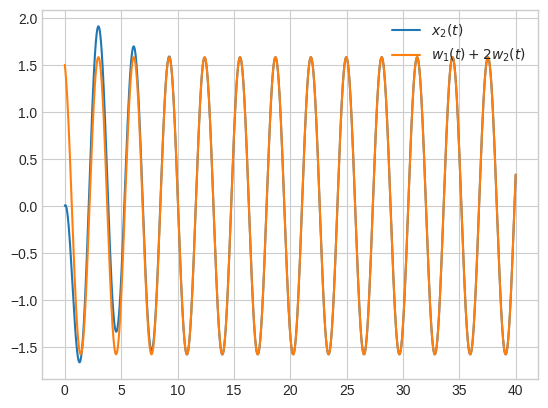

In [97]:
plt.plot(time_3, out_3.states[1],label="$x_2(t)$")
plt.plot(time_3, w_3[0] + 2*w_3[1],label="$w_1(t) + 2w_2(t)$")
plt.legend()

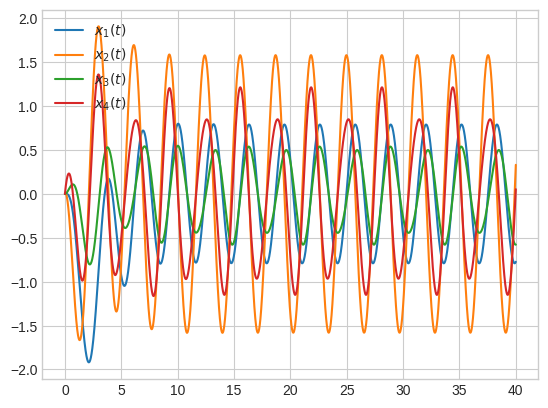

In [98]:
plt.plot(time_3, out_3.states[0],label="$x_1(t)$")
plt.plot(time_3, out_3.states[1],label="$x_2(t)$")
plt.plot(time_3, out_3.states[2],label="$x_3(t)$")
plt.plot(time_3, out_3.states[3],label="$x_4(t)$")
plt.legend()

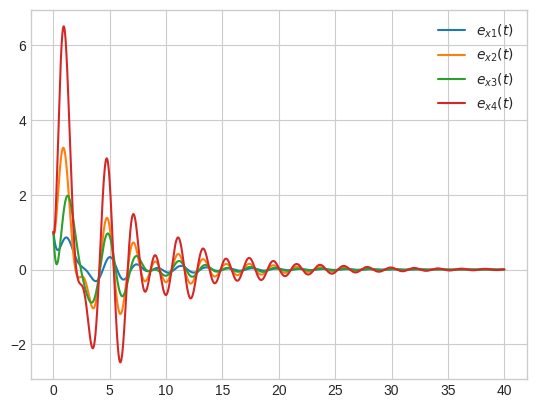

In [99]:
plt.plot(time_3, out_3.states[4],label="$e_{x1}(t)$")
plt.plot(time_3, out_3.states[5],label="$e_{x2}(t)$")
plt.plot(time_3, out_3.states[6],label="$e_{x3}(t)$")
plt.plot(time_3, out_3.states[7],label="$e_{x4}(t)$")
plt.legend()

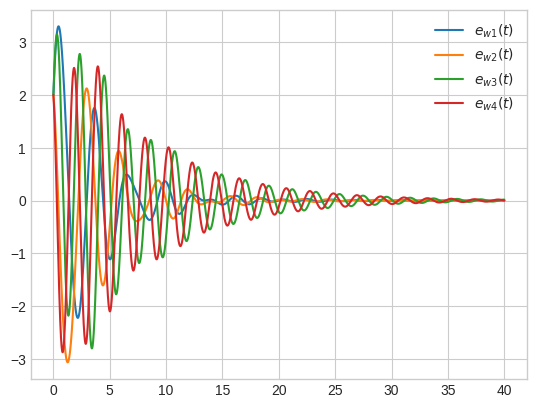

In [100]:
plt.plot(time_3, out_3.states[8],label="$e_{w1}(t)$")
plt.plot(time_3, out_3.states[9],label="$e_{w2}(t)$")
plt.plot(time_3, out_3.states[10],label="$e_{w3}(t)$")
plt.plot(time_3, out_3.states[11],label="$e_{w4}(t)$")
plt.legend()

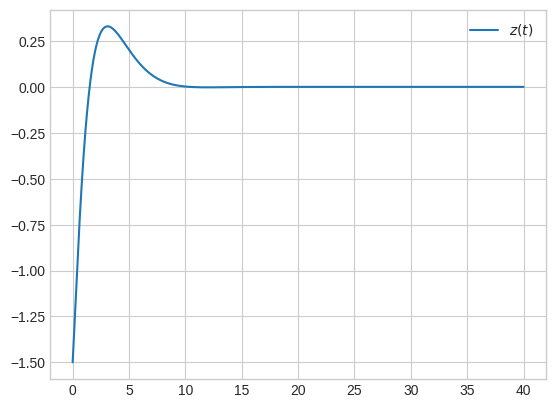

In [101]:
plt.plot(time_3,out_3.outputs[-1],label="$z(t)$")
plt.legend()

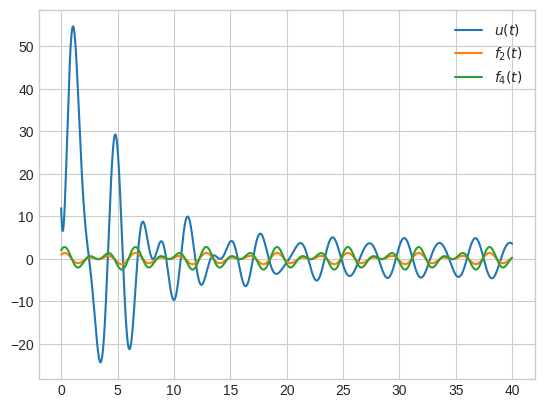

In [102]:
plt.plot(time_3, (K_1 @ (out_3.states[:4] - out_3.states[4:8]) + K_2 @ w_3)[0], label="$u(t)$")
plt.plot(time_3, (B_2 @ w_3)[1], label="$f_2(t)$")
plt.plot(time_3, (B_2 @ w_3)[3], label="$f_4(t)$")
plt.legend()

In [103]:
reg_mat = np.block([
    [A_1 + B_1@K_1 + L_1@C_1, B_2 + B_1@K_2 + L_1@D_1],
    [L_2@C_1, A_2 + L_2@D_1],
])
np.round(np.linalg.eigvals(reg_mat),2)

array([-4.49+4.09j, -4.49-4.09j, -0.  +3.01j, -0.  -3.01j, -0.66+0.39j,
       -0.66-0.39j,  0.08+1.88j,  0.08-1.88j])

## Task 4

In [104]:
A_1 = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 2, 0]
])

B_1 = np.array([
    [0],
    [1],
    [0],
    [1]
])

B_2 = np.array([
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
    [2, 0, 2, 0]
])

A_2 = np.array([
    [0, 2, 0, 0],
    [-2, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 0, -3, 0]
])

C_1 = np.array([
    [1, 0, 1, 0]
])

D_1 = np.array([
    [-1, 0, -1, 0],
])

C_2 = np.array([
    [1, 0, 1, 0],
])

D_2 = np.array([
    [-1, 0, -1, 0],
])

In [105]:
A_obs = np.block([
    [A_1, B_2],
    [np.zeros((4, 4)), A_2]
])
C_obs = np.block([
    [C_1, D_1]
])
L, _ = generate_Kalman(A_obs, C_obs, np.eye(8), np.eye(1))
L_1, L_2 = -L[:4], -L[4:]

In [106]:
L_1

array([[ -0.27693462],
       [ -5.88444564],
       [ -8.54419231],
       [-14.00495926]])

In [107]:
L_2

array([[-0.47772811],
       [ 1.33108071],
       [-0.87575461],
       [ 1.11042958]])

In [108]:
K_1, _ = generate_LQR(A_1, B_1, np.eye(4), np.eye(1))
K_1

array([[ 1.        ,  3.96076458, -9.34382802, -8.28368674]])

In [109]:
P = cp.Variable(A_1.shape)
Y = cp.Variable((B_1.shape[1],B_1.shape[0])) 
prob = cp.Problem(cp.Maximize(0),[C_2 @ P + D_2 == 0, P @ A_2 - A_1 @ P == B_1 @ Y + B_2])
prob.solve()

0.0

In [110]:
K_2 = Y.value - K_1 @ P.value
K_2

array([[-1.55205733,  0.24143839, -3.27628294,  3.58438162]])

In [111]:
A_new = np.block([
    [A_1 + B_1@K_1, np.zeros((4,4)), np.zeros((4,4))],
    [np.zeros((4,4)), A_1 + L_1@C_1, B_2 + L_1@D_1],
    [np.zeros((4,4)), L_2@C_1, A_2 + L_2@D_1]
])

B_new = np.block([
    [B_2 + B_1@K_2],
    [np.zeros((4,4))],
    [np.zeros((4,4))]
])

C_new = np.block([
    [C_1, np.zeros((1, 4)), np.zeros((1, 4))],
    [C_1, -C_1, -D_1],
    [C_2, np.zeros((1, 4)), np.zeros((1, 4))]
])
D_new = np.block([
    [D_1],
    [D_1],
    [D_2]
])

In [112]:
sys_4 = ctrl.ss(A_new, B_new, C_new, D_new)
time_4 = np.linspace(0,20,int(20/0.005))
w_sys_4 = ctrl.ss(A_2, np.zeros((4,1)), np.zeros((1, 4)), 0)
w_4 = ctrl.initial_response(w_sys_4, X0=[0.5, 0.5, 0.5, 0.5], T=time_4).states
out_4 = ctrl.forced_response(sys_4,T=time_4,X0=[0,0,0,0,1,1,1,1,2,2,2,2], U=w_4)

In [113]:
L_2.shape

(4, 1)

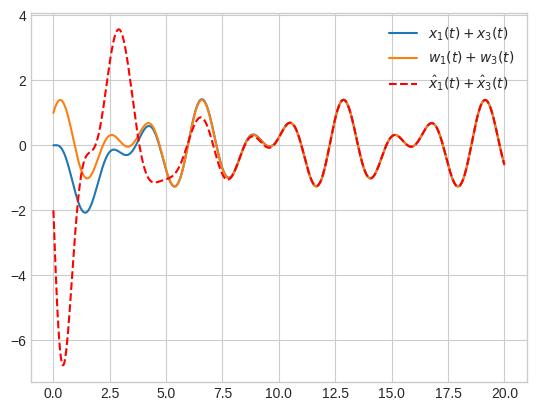

In [114]:
plt.plot(time_4, out_4.states[0] + out_4.states[2],label="$x_1(t) + x_3(t)$")
plt.plot(time_4, w_4[0] + w_4[2],label="$w_1(t) + w_3(t)$")
plt.plot(time_4, out_4.states[0] - out_4.states[4] + out_4.states[2] - out_4.states[6], "r--",label="$\hat{x}_1(t) + \hat{x}_3(t)$")
plt.legend()

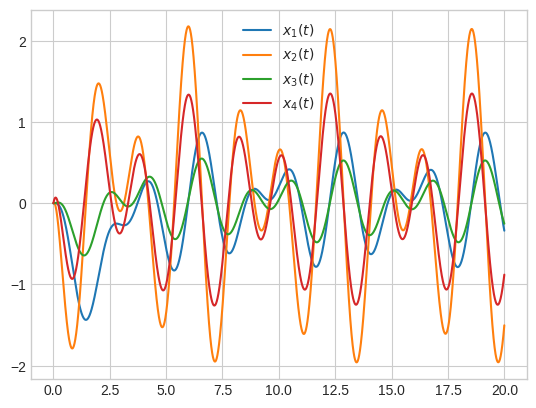

In [115]:
plt.plot(time_4, out_4.states[0],label="$x_1(t)$")
plt.plot(time_4, out_4.states[1],label="$x_2(t)$")
plt.plot(time_4, out_4.states[2],label="$x_3(t)$")
plt.plot(time_4, out_4.states[3],label="$x_4(t)$")
plt.legend()

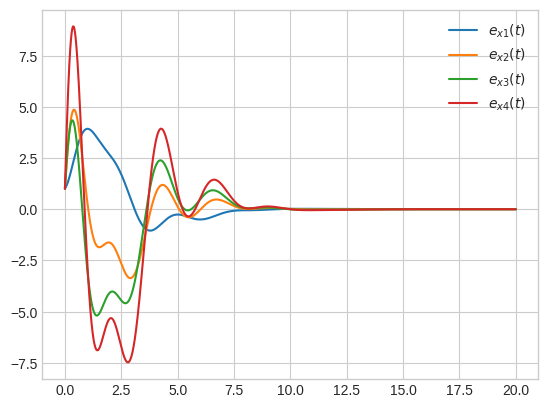

In [116]:
plt.plot(time_4, out_4.states[4],label="$e_{x1}(t)$")
plt.plot(time_4, out_4.states[5],label="$e_{x2}(t)$")
plt.plot(time_4, out_4.states[6],label="$e_{x3}(t)$")
plt.plot(time_4, out_4.states[7],label="$e_{x4}(t)$")
plt.legend()

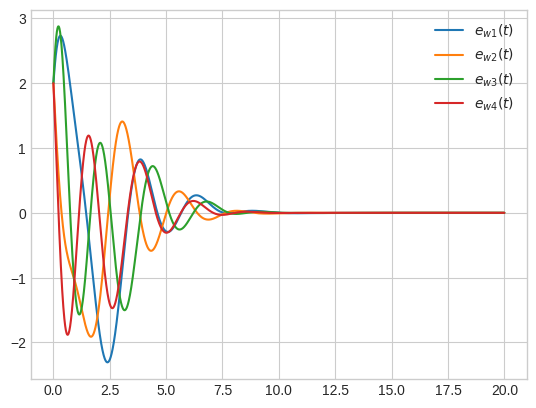

In [117]:
plt.plot(time_4, out_4.states[8],label="$e_{w1}(t)$")
plt.plot(time_4, out_4.states[9],label="$e_{w2}(t)$")
plt.plot(time_4, out_4.states[10],label="$e_{w3}(t)$")
plt.plot(time_4, out_4.states[11],label="$e_{w4}(t)$")
plt.legend()

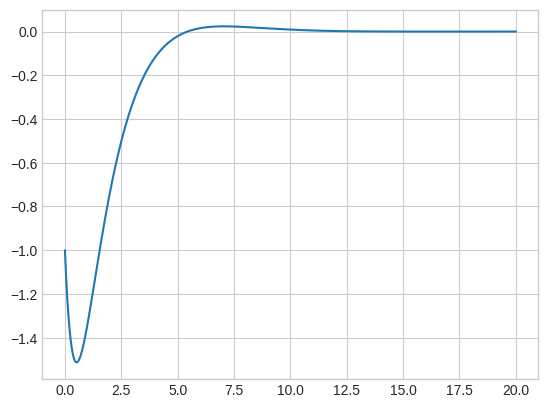

In [118]:
plt.plot(time_4, out_4.outputs[-1])

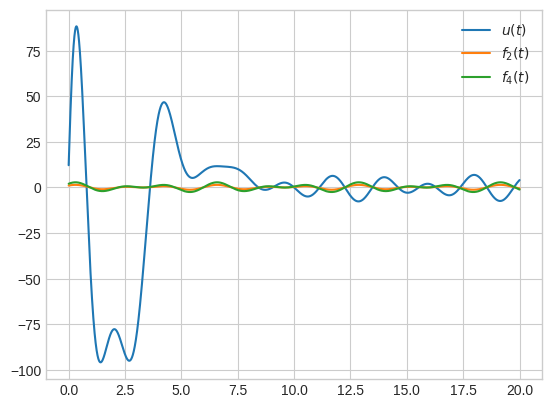

In [119]:
plt.plot(time_4, (K_1 @ (out_4.states[:4] - out_4.states[4:8]) + K_2 @ w_4)[0], label="$u(t)$")
plt.plot(time_4, (B_2 @ w_4)[1], label="$f_2(t)$")
plt.plot(time_4, (B_2 @ w_4)[3], label="$f_4(t)$")
plt.legend()

In [120]:
reg_mat = np.block([
    [A_1 + B_1@K_1 + L_1@C_1, B_2 + B_1@K_2 + L_1@D_1],
    [L_2@C_1, A_2 + L_2@D_1],
])
np.round(np.linalg.eigvals(reg_mat),2)

array([-6.68+6.51j, -6.68-6.51j,  2.27+0.j  , -0.71+0.j  , -0.  +3.j  ,
       -0.  -3.j  , -0.  +2.j  , -0.  -2.j  ])